# Check GPU

In [1]:
import torch

gpu_available = torch.cuda.is_available()
print(f"GPU Available: {gpu_available}")

if gpu_available:
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU Name: {gpu_name}")

GPU Available: True
GPU Name: NVIDIA H100


# Load datasets

In [1]:
from datasets import load_dataset
import pandas as pd
import os

data_path = "../data/elaborations"

data_files_c2s = {
    'train': os.path.join(data_path,"train","train_ds_c2s.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2s.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2s.csv")         
}

data_files_c2s_masked = {
    'train': os.path.join(data_path,"train","train_ds_c2s_masked_bart.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2s_masked_bart.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2s_masked_bart.csv")         
}

data_files_c2sp = {
    'train': os.path.join(data_path,"train","train_ds_c2sp.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2sp.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2sp.csv")         
}

data_files_c2sp_masked = {
    'train': os.path.join(data_path,"train","train_ds_c2sp_masked_bart.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2sp_masked_bart.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2sp_masked_bart.csv")         
}

data_files_c4s = {
    'train': os.path.join(data_path,"train","train_ds_c4s.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c4s.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c4s.csv")         
}

data_files_c4s_masked = {
    'train': os.path.join(data_path,"train","train_ds_c4s_masked_bart.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c4s_masked_bart.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c4s_masked_bart.csv")         
}


data_files_c2os = {
    'train': os.path.join(data_path,"train","train_ds_c2os.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2os.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2os.csv")         
}

data_files_c2osp = {
    'train': os.path.join(data_path,"train","train_ds_c2osp.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c2osp.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c2osp.csv")         
}

data_files_c4sp = {
    'train': os.path.join(data_path,"train","train_ds_c4sp.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c4sp.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c4sp.csv")         
}

data_files_c4sp_masked = {
    'train': os.path.join(data_path,"train","train_ds_c4sp_masked_bart.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c4sp_masked_bart.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c4sp_masked_bart.csv")         
}

data_files_c4osp = {
    'train': os.path.join(data_path,"train","train_ds_c4osp.csv"),      
    'validation': os.path.join(data_path,"validation","valid_ds_c4osp.csv"),  
    'test': os.path.join(data_path,"test","test_ds_c4osp.csv")         
}

dataset = load_dataset('csv', data_files=data_files_c4sp)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating'],
        num_rows: 1049
    })
    validation: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating'],
        num_rows: 134
    })
    test: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating'],
        num_rows: 116
    })
})


In [2]:
dataset["train"][0]

{'doc_num': 1,
 'source_text': 'The Treasury makes it nearly impossible to copy our currency. For example, the $10, $20, $50 and $100 bills all include watermark portraits. A watermark is an image that can be seen in the paper when you hold it up to the light. Investigators say Kellogg tried to copy the watermark.',
 'label_text': "The Treasury makes it nearly impossible to copy our currency. For example, the $10, $20, $50 and $100 bills all include watermark portraits. A watermark is an image that can be seen in the paper when you hold it up to the light. Investigators say Kellogg tried to copy the watermark. Here's how they say he did it.",
 'elaboration_sentence': "Here's how they say he did it.",
 'contextual_specificity_rating': 1}

## Add subject, target info

In [2]:
df_train_s = pd.read_csv(os.path.join(data_path, "train_ds_s_subjects_targets.csv"))
df_train_sp = pd.read_csv(os.path.join(data_path, "train_ds_sp_subjects_targets.csv"))

df_valid_s = pd.read_csv(os.path.join(data_path, "validation_ds_s_subjects_targets.csv"))
df_valid_sp = pd.read_csv(os.path.join(data_path, "validation_ds_sp_subjects_targets.csv"))

df_test_s = pd.read_csv(os.path.join(data_path, "test_ds_s_subjects_targets.csv"))
df_test_sp = pd.read_csv(os.path.join(data_path, "test_ds_sp_subjects_targets.csv"))

df_train = df_train_sp
df_valid = df_valid_sp
df_test = df_test_sp

col_name = "subject" #"target_sentence_target"#"target_sentence_4o"

dataset["train"] = dataset["train"].add_column(col_name, df_train[col_name])
dataset["validation"] = dataset["validation"].add_column(col_name, df_valid[col_name])
dataset["test"] = dataset["test"].add_column(col_name, df_test[col_name])

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating', 'target_sentence_4o', 'subject'],
        num_rows: 1046
    })
    validation: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating', 'target_sentence_4o', 'subject'],
        num_rows: 132
    })
    test: Dataset({
        features: ['doc_num', 'source_text', 'label_text', 'elaboration_sentence', 'contextual_specificity_rating', 'target_sentence_4o', 'subject'],
        num_rows: 116
    })
})

## Check texts length

In [3]:
def count_texts_over_word_limit(dataset_dict, column, word_limit=512):
    word_count = {}

    for split in dataset_dict:
        dataset = dataset_dict[split]
        count_over_limit = 0

        for example in dataset:
            try:
                num_words = len(example[column].split()) # count on spaces
                if num_words > word_limit:
                    count_over_limit += 1
            except AttributeError as e: 
                print(f"Empty string in doc num: {example['doc_num']}")
                continue 

        word_count[split] = count_over_limit

    return word_count

In [15]:
print("Model's max length: ", tokenizer.model_max_length)

Model's max length:  1024


In [4]:
count_texts_over_word_limit(dataset, column='elaboration_sentence', word_limit=32)

{'train': 0, 'validation': 0, 'test': 0}

In [6]:
count_texts_over_word_limit(dataset, column='source_text', word_limit=512)

{'train': 0, 'validation': 0, 'test': 0}

# Load the model

In [3]:
from transformers import BartTokenizerFast, BartForConditionalGeneration, BartTokenizer
import torch
torch.cuda.empty_cache()

tokenizer = BartTokenizer.from_pretrained('facebook/bart-base',use_fast=False, cache_dir="../models/bart/") 
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base', cache_dir="../models/bart/", device_map ={'':torch.cuda.current_device()})

#tokenizer = BartTokenizer.from_pretrained('facebook/bart-large',use_fast=False) 
#model = BartForConditionalGeneration.from_pretrained('facebook/bart-large', device_map ={'':torch.cuda.current_device()})

# Tokenize datasets

In [5]:
def calculate_average_token_length(dataset_dict, column):
    token_lengths = {}

    for split in dataset_dict:
        dataset = dataset_dict[split]
        total_tokens = 0
        num_texts = 0

        for example in dataset:
            try:
                # Tokenize the text and count the number of tokens
                tokens = tokenizer(example[column], truncation=False, padding=False)['input_ids']
                total_tokens += len(tokens)
                num_texts += 1
            except (AttributeError, KeyError) as e:
                print(f"Error processing text in split '{split}', doc num: {example.get('doc_num', 'unknown')}")
                continue

        # Calculate the average token length for the split
        if num_texts > 0:
            average_length = total_tokens / num_texts
        else:
            average_length = 0  # Set to 0 if no valid texts

        token_lengths[split] = average_length

    return token_lengths

average_token_lengths = calculate_average_token_length(dataset, column="source_text")
average_label_lengths = calculate_average_token_length(dataset, column="elaboration_sentence")
print("Average token lengths per split:", average_token_lengths)
print("Average label lengths per split:", average_label_lengths)

Average token lengths per split: {'train': 103.74928503336511, 'validation': 103.44029850746269, 'test': 103.5}
Average label lengths per split: {'train': 12.938036224976168, 'validation': 13.26865671641791, 'test': 13.112068965517242}


## Tokenizer

In [7]:
print('<mask>' in tokenizer.get_vocab())

True


In [4]:
from transformers import AddedToken

special_tokens_dict = {
    'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
    'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True)
}

# add the special tokens to the tokenizer
tokenizer.add_special_tokens(special_tokens_dict)

0

## Tokenize datasets

In [6]:
import numpy as np

def format_sent_target(examples):
    texts = []
    contexts = examples['source_text']
    target_sents = examples['target_sentence_4o']
    targets = examples['target_sentence_target']
    for context, sent, target in zip(contexts, target_sents, targets):
        texts.append(context + " " + sent + ", " + target) #+ "target=" + target)
    return texts

def format_target(examples):
    texts = []
    contexts = examples['source_text']
    targets = examples['subject']
    for context, target in zip(contexts, targets):
        texts.append( context + " target=" + target)
    return texts

def tokenize_func(examples):
    # inputs 2s, 2sp, 4s - 128, 4sp - 150 format_target(examples)
    inputs = tokenizer(format_target(examples), truncation=True, padding="max_length", max_length=150)
    # labels
    labels = tokenizer(examples['elaboration_sentence'],truncation=True, padding="max_length", max_length=32)
    # set the labels in the input dictionary
    inputs['labels'] = np.array(labels['input_ids']) #labels['input_ids']
    return inputs

tokenized_dataset = dataset.map(tokenize_func, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/1049 [00:00<?, ? examples/s]

Map:   0%|          | 0/134 [00:00<?, ? examples/s]

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

In [5]:
format_target(dataset["test"])[0]

'New companies have come that need skilled workers with more education. New Haven youth want those jobs, but they do not have the education or the skills. target=Many (youth)'

# Set up model's configuration

## Dropout

In [6]:
model.config.dropout = 0.2
print(model.config.dropout)

0.2


# Train the model

In [8]:
num_samples = len(dataset['train'])
batch_size= 2
logging_steps = 25
print("Steps per epoch: ", num_samples//batch_size )
print("Logging steps: " ,num_samples//batch_size//logging_steps )

Steps per epoch:  524
Logging steps:  20


## Seq2Seq

In [7]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, EarlyStoppingCallback
import numpy as np
from easse.sari import corpus_sari
from sacrebleu.tokenizers.tokenizer_13a import Tokenizer13a
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from transformers import DataCollatorForSeq2Seq
import os 
# disable parallelism warnings
os.environ["TOKENIZERS_PARALLELISM"] = "false"

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

model.train()

output_name = "c4sp-subject"

training_args = Seq2SeqTrainingArguments(
    output_dir=f"../models/bart/bart-news-ft/results/results-bart-{output_name}", 
    eval_strategy="epoch",
    save_strategy = "epoch",
    logging_strategy="steps",
    logging_steps=25,
    learning_rate=1e-5, # paper: 1e-4
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2, 
    num_train_epochs=3,
    save_total_limit=1,
    weight_decay=0.01,
    warmup_steps = 2,
    #gradient_accumulation_steps=2,
    optim = "paged_adamw_8bit",
    load_best_model_at_end=True,
    greater_is_better=False, # the lower the loss the better
    fp16=True,
    logging_dir=f"../models/bart/bart-news-ft/logs/logs-bart-{output_name}",
    predict_with_generate=True,
    metric_for_best_model='eval_loss'
)


trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    #tokenizer=tokenizer,
    data_collator=data_collator,
    #compute_metrics=compute_bleu,
    #callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

model.config.use_cache = False

In [8]:
trainer.train()

/home/6/ud03926/nlp/lib64/python3.9/site-packages/transformers/data/data_collator.py:657: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Epoch,Training Loss,Validation Loss
1,1.091200,0.920822
2,0.888100,0.898531
3,0.872600,0.899946


/home/6/ud03926/nlp/lib64/python3.9/site-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=1575, training_loss=1.484238161965022, metrics={'train_runtime': 68.766, 'train_samples_per_second': 45.764, 'train_steps_per_second': 22.904, 'total_flos': 281080171008000.0, 'train_loss': 1.484238161965022, 'epoch': 3.0})

## Trainer

In [ ]:
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from easse.sari import corpus_sari
from tqdm.notebook import tqdm

def compute_sari(pred):
    
    predictions = pred.predictions
    labels = pred.label_ids
    
    # decode the predictions and labels into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # source texts 
    sources = tokenized_dataset['validation']['r_content']

    # SARI scores
    sari_scores = []
    for pred, label, source in tqdm(zip(decoded_preds, decoded_labels, sources)):
        sari_score = corpus_sari(
            orig_sents=[source],  # original source sentence
            sys_sents=[pred],     # system's generated sentence
            refs_sents=[[label]]  # reference simplified sentence
        )
        sari_scores.append(sari_score)
    
    # average SARI score across all examples
    avg_sari = np.mean(sari_scores)
    return {"sari": avg_sari}

model.train()

training_args = TrainingArguments(
    output_dir="../models/bart-news-ft/results/results-news-bart-epoch10-lr1-trainer",
    eval_strategy="epoch", 
    save_strategy = "epoch", 
    logging_strategy="steps",
    logging_steps=25,
    learning_rate=1e-5, 
    per_device_train_batch_size=6, 
    per_device_eval_batch_size=6, 
    num_train_epochs=10, 
    weight_decay=0.01,
    save_total_limit=3, 
    #gradient_accumulation_steps=6, # reduce memory
    load_best_model_at_end=True, # based on valid loss
    metric_for_best_model='loss',
    warmup_steps = 2,
    optim = "paged_adamw_8bit", # optimizer for quantization
    fp16=True, # enable half-precision
    logging_dir="../models/bart-news-ft/logs/logs-news-bart-epoch10-lr1-trainer",
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_sari,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

model.config.use_cache = False

In [ ]:
trainer.train()

## Training Process

In [6]:
log_history = trainer.state.log_history
eval_logs = [log for log in log_history if "eval_loss" in log]

# the best (lowest) validation loss
best_eval_log = min(eval_logs, key=lambda x: x["eval_loss"])

print(f"Best validation loss: {best_eval_log['eval_loss']}")
print(f"Epoch of the best model: {best_eval_log['epoch']}")
#print("Sari score: ", best_eval_log['eval_sari'] )

Best validation loss: 1.0316681861877441
Epoch of the best model: 2.0


In [8]:
import json

# Path to the `trainer_state.json` file in your checkpoint directory
trainer_state_path = f"../models/bart/bart-news-ft/results/results-bart-{output_name}/checkpoint-1050/trainer_state.json"

# Open and load the JSON file
with open(trainer_state_path, "r") as file:
    trainer_state = json.load(file)

eval_logs = [log for log in trainer_state.get("log_history", []) if "eval_loss" in log]

for log in eval_logs:
    print(f"Epoch: {log.get('epoch', 'N/A')}, Step: {log.get('step', 'N/A')}, Eval Loss: {log['eval_loss']}")

Epoch: 1.0, Step: 525, Eval Loss: 1.0531353950500488
Epoch: 2.0, Step: 1050, Eval Loss: 1.0316681861877441


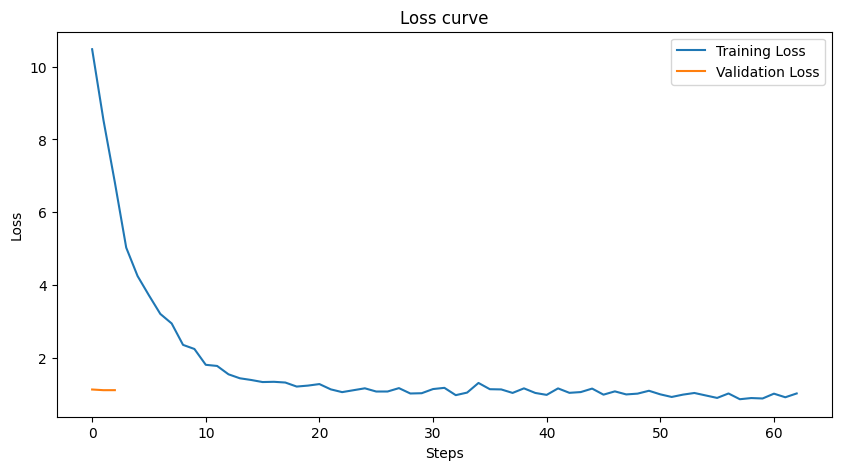

In [12]:
import matplotlib.pyplot as plt

# loss values from the log history
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
steps = range(len(train_loss))

plt.figure(figsize=(10,5))
plt.plot(steps, train_loss, label='Training Loss')
plt.plot(steps[:len(eval_loss)], eval_loss, label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.legend()
plt.show()

# Save model

In [22]:
generation_config.save_pretrained("../models/bart-news-ft/model-2csp")
#tokenizer.save_pretrained("../models/bart-swipe-ft/model-swipe-clean")
model.save_pretrained("../models/bart-news-ft/model-2csp")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


# Load the saved model

In [1]:
from transformers import BartForConditionalGeneration, BartTokenizer, GenerationConfig


model_path = "../models/bart-news-short-ft/model-news-short-bart-tokenizer"

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large', use_fast=False)
model = BartForConditionalGeneration.from_pretrained(model_path)
generation_config = GenerationConfig.from_pretrained(model_path)
model.generation_config = generation_config

# Generate predictions (Greedy Decoding)

In [9]:
from tqdm import tqdm
from transformers import GenerationConfig

generation_config = GenerationConfig(
    bos_token_id = 0,
    decoder_start_token_id = 2,
    early_stopping = True,
    do_sample = False,
    max_new_tokens = 32, # 512
    eos_token_id = 2, 
    forced_bos_token_id = 0,
    forced_eos_token_id = 2,
    no_repeat_ngram_size = 3,
    num_beams = 4,
    pad_token_id = 1,
    num_return_sequences=1
    
)

predictions = []

model.eval()
model.config.use_cache = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad(): # format_target(dataset["test"]) dataset["test"]["source_text"]
    for example in tqdm(format_target(dataset["test"])):
        # tokenize the text
        input_ids = tokenizer(example, return_tensors="pt")
        # move input_ids to the same device as the model
        input_ids = {key: value.to(device) for key, value in input_ids.items()}
        
        # generate prediction
        output_ids = model.generate(**input_ids, generation_config=generation_config ) # temperature=0.45, do_sample=True
        simplified_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        
        predictions.append(simplified_text)

100%|█████████████████████████████████████████| 116/116 [00:08<00:00, 13.57it/s]


## temp set

In [12]:
from tqdm import tqdm
import torch
torch.cuda.empty_cache()
from transformers import GenerationConfig

generation_config = GenerationConfig(
    bos_token_id = 0,
    decoder_start_token_id = 2,
    early_stopping = True,
    do_sample = True,
    temperature = 0.45,
    top_k = 40,
    max_new_tokens = 32, # 512
    eos_token_id = 2, 
    forced_bos_token_id = 0,
    forced_eos_token_id = 2,
    no_repeat_ngram_size = 3,
    num_beams = 4,
    pad_token_id = 1,
    num_return_sequences=1
    
)

predictions = []

model.eval()
model.config.use_cache = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

with torch.no_grad():
    for example in tqdm(format_target(dataset['test'])):
        # tokenize the text
        input_ids = tokenizer(example, return_tensors="pt")
        # move input_ids to the same device as the model
        input_ids = {key: value.to(device) for key, value in input_ids.items()}
        
        # generate prediction
        output_ids = model.generate(**input_ids, generation_config=generation_config ) # temperature=0.45, do_sample=True
        simplified_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        
        predictions.append(simplified_text)

100%|█████████████████████████████████████████| 116/116 [00:08<00:00, 13.18it/s]


## SARI

In [18]:
from tqdm.notebook import tqdm
from easse.sari import corpus_sari


sari_scores_easse = []

for index, row in tqdm(enumerate(dataset["test"]), total=len(dataset["test"])):
    r_content = row['source_text'] 
    s_content = row['label_text']
    prediction = predictions[index] 
    
    sari_score_easse = corpus_sari(
        orig_sents=[r_content],
        sys_sents=[prediction],
        refs_sents=[[s_content]]
    )
    
    sari_scores_easse.append(sari_score_easse)

  0%|          | 0/116 [00:00<?, ?it/s]

In [15]:
import numpy as np
print("Average SARI score:", np.mean(sari_scores_easse))

Average SARI score: 5.227781836125757


## BLEU scores

In [16]:
from tqdm.notebook import tqdm
from easse.bleu import corpus_bleu


bleu_scores_easse = []

for index, row in tqdm(enumerate(dataset["test"]), total=len(dataset["test"])):
    s_content = row['label_text']
    prediction = predictions[index] 
    
    bleu_score_easse = corpus_bleu(
        sys_sents=[prediction],
        refs_sents=[[s_content]]
    )
    
    bleu_scores_easse.append(bleu_score_easse)

  0%|          | 0/116 [00:00<?, ?it/s]

In [17]:
import numpy as np
print("Average SARI score:", np.mean(sari_scores_easse))
print("Average BLEU score:", np.mean(bleu_scores_easse))

Average SARI score: 37.00045679144054
Average BLEU score: 84.0330736387988


## Save generation results

In [10]:
import pandas as pd

df_results = pd.DataFrame({
    'source_text': dataset['test']['source_text'], 
    'elaboration_sentence': dataset['test']['elaboration_sentence'],
    'pred_elaboration': predictions
})

df_results.to_csv(f"../data/gen_predictions/predictions_bart-{output_name}.csv", index=False)
print(output_name)

c4sp-subject
